In [1]:
from google.colab import files
uploaded=files.upload()

Saving emails.csv to emails.csv


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("emails.csv")

In [4]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.shape

(5172, 3002)

In [7]:
df.isnull()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().count()

,0
Email No.,5172
the,5172
to,5172
ect,5172
and,5172
...,...
military,5172
allowing,5172
ff,5172
dry,5172


In [9]:
x=df.drop(['Email No.','Prediction'],axis=1)
y=df['Prediction']

In [10]:
x.shape

(5172, 3000)

In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3000 entries, the to dry
dtypes: int64(3000)
memory usage: 118.4 MB


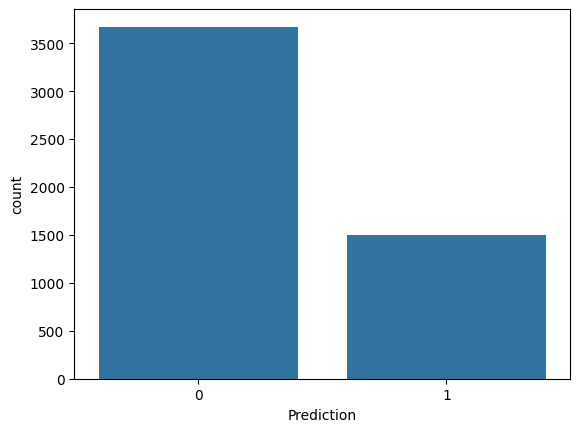

In [13]:
import seaborn as sns
sns.countplot(x=y);

In [15]:
y.value_counts()

,count
Prediction,
0,3672
1,1500


In [16]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
x_scaled=scalar.fit_transform(x)

In [17]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=0,test_size=0.25)

In [19]:
x_scaled.shape

(5172, 3000)

In [21]:
x_train.shape

(3879, 3000)

In [22]:
x_test.shape

(1293, 3000)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn=KNeighborsClassifier(n_neighbors=5)

In [25]:
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [26]:
y_pred=knn.predict(x_test)

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report

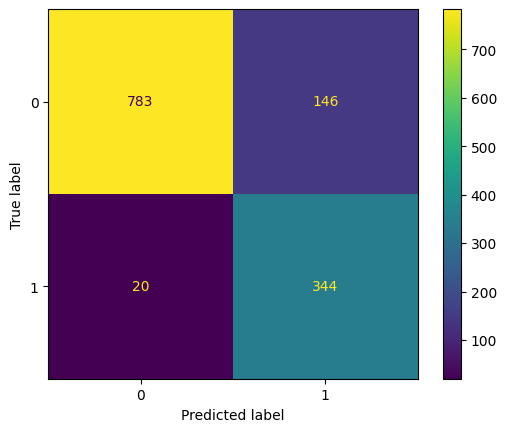

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [30]:
accuracy_score(y_test,y_pred)

0.871616395978345

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293



In [32]:
from sklearn.svm import SVC

In [33]:
svm=SVC(kernel='rbf')

In [34]:
svm.fit(x_train,y_train)

SVC()

In [35]:
y_pred=svm.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred)


0.9450889404485692

In [38]:
svm=SVC(kernel='linear')

In [39]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [40]:
y_pred=svm.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred)

0.9767981438515081

In [46]:
svm=SVC(kernel='poly')

In [47]:
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [48]:
y_pred=svm.predict(x_test)

In [49]:
accuracy_score(y_test,y_pred)

0.7548337200309359